In [1]:
import pandas as pd

# Load the dataset AND save it into the variable 'df'
df = pd.read_csv('/content/insurance.csv')

# Now 'df' holds the data, so we can print it
print("--- First 5 Rows of the Dataset ---")
print(df.head())

print("\n--- Column Data Types ---")
print(df.dtypes)

--- First 5 Rows of the Dataset ---
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

--- Column Data Types ---
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


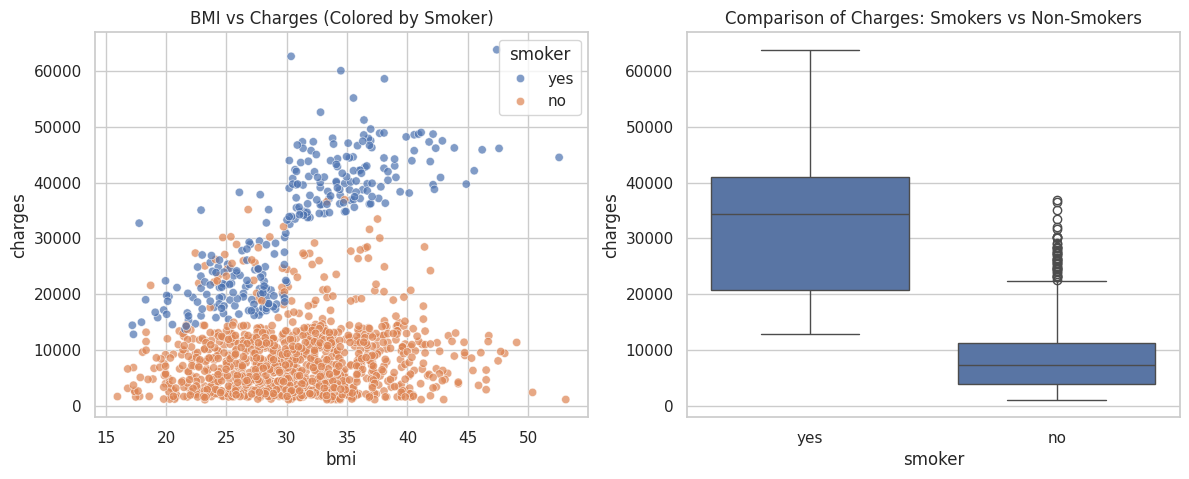

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style to make it look nice
sns.set(style="whitegrid")

# Create a figure with 2 side-by-side charts
plt.figure(figsize=(14, 5))

# Chart 1: Scatter Plot (BMI vs Charges)
# We color the dots based on 'smoker' to see if smoking changes the pattern
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('BMI vs Charges (Colored by Smoker)')

# Chart 2: Box Plot (Smoker vs Charges)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Comparison of Charges: Smokers vs Non-Smokers')

plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Convert Categorical Data to Numbers (One-Hot Encoding)
# This turns 'sex', 'smoker', 'region' into number columns (0s and 1s)
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Separate Features (X) and Target (y)
# X = All columns EXCEPT 'charges' (inputs)
# y = Only the 'charges' column (what we want to predict)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# 3. Split into Train (80%) and Test (20%) sets
# random_state=42 ensures we get the same shuffle every time we run it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardize the Data (Scale it)
# We only scale the numerical columns, not the target
scaler = StandardScaler()

# Fit on training data, then transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Let's check the shape to make sure it worked
print("Original Data shape:", df.shape)
print("Training Data shape:", X_train_scaled.shape)
print("Testing Data shape:", X_test_scaled.shape)
print("\n--- Example of Processed Data (First Row) ---")
print(X_train_scaled[0])

Original Data shape: (1338, 7)
Training Data shape: (1070, 8)
Testing Data shape: (268, 8)

--- Example of Processed Data (First Row) ---
[ 0.47222651 -1.75652513  0.73433626 -1.0246016  -0.50874702  1.78316783
 -0.59966106 -0.5723141 ]


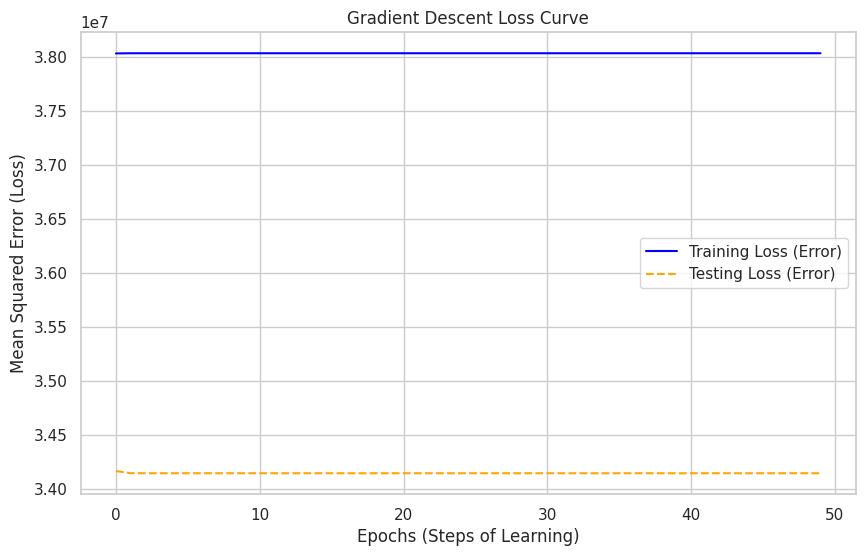

Final Training Error: 38033220.12
Final Testing Error: 34143327.70


In [4]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Initialize the Linear Regression model with Gradient Descent
# 'warm_start=True' allows us to train step-by-step and track progress
# 'learning_rate' controls how big our steps downhill are
sgd_model = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate='constant', eta0=0.01, random_state=42)

train_losses = []
test_losses = []

# 2. The Training Loop (taking 50 steps downhill)
epochs = 50
for epoch in range(epochs):
    # Take one step of learning
    sgd_model.fit(X_train_scaled, y_train)

    # Measure error (MSE) on Training Data
    y_train_pred = sgd_model.predict(X_train_scaled)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_losses.append(train_loss)

    # Measure error (MSE) on Testing Data
    y_test_pred = sgd_model.predict(X_test_scaled)
    test_loss = mean_squared_error(y_test, y_test_pred)
    test_losses.append(test_loss)

# 3. Plot the Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss (Error)', color='blue')
plt.plot(test_losses, label='Testing Loss (Error)', color='orange', linestyle='--')
plt.xlabel('Epochs (Steps of Learning)')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Gradient Descent Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final Training Error: {train_losses[-1]:.2f}")
print(f"Final Testing Error: {test_losses[-1]:.2f}")

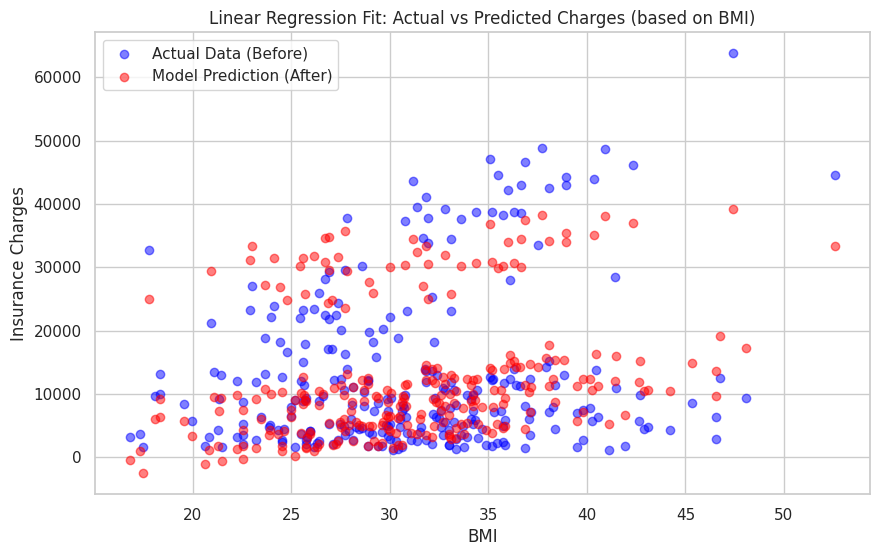

In [5]:
# Make predictions on the test data using our trained model
y_pred = sgd_model.predict(X_test_scaled)

# We need the original BMI values to plot them (they were scaled, so we need to grab them from the original X_test)
# Note: Since we split the data earlier, we can just use X_test['bmi']

plt.figure(figsize=(10, 6))

# 1. Plot the Actual Data (Blue Dots)
plt.scatter(X_test['bmi'], y_test, color='blue', alpha=0.5, label='Actual Data (Before)')

# 2. Plot the Model's Predictions (Red Dots/Line)
# We scatter the predictions to show where the model thinks the points should be
plt.scatter(X_test['bmi'], y_pred, color='red', alpha=0.5, label='Model Prediction (After)')

plt.title('Linear Regression Fit: Actual vs Predicted Charges (based on BMI)')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.legend()
plt.show()

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression # Standard Linear Regression for fair comparison

# 1. Initialize the 3 Models
# We use standard LinearRegression here as it's often more stable than SGD for comparison
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train (Fit) all 3 models on the Training Data
lin_reg.fit(X_train_scaled, y_train)
tree_reg.fit(X_train_scaled, y_train)
forest_reg.fit(X_train_scaled, y_train)

# 3. Test them! (Predict on Test Data)
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_tree = tree_reg.predict(X_test_scaled)
y_pred_forest = forest_reg.predict(X_test_scaled)

# 4. Check the Scores (R-squared Score)
# Higher is better (closer to 1.0 is best)
from sklearn.metrics import r2_score

score_lin = r2_score(y_test, y_pred_lin)
score_tree = r2_score(y_test, y_pred_tree)
score_forest = r2_score(y_test, y_pred_forest)

print("--- Model Comparison Results ---")
print(f"1. Linear Regression Score: {score_lin:.4f}")
print(f"2. Decision Tree Score:     {score_tree:.4f}")
print(f"3. Random Forest Score:     {score_forest:.4f}")

# Determine the winner
if score_forest > score_tree and score_forest > score_lin:
    print("\n🏆 WINNER: Random Forest is the best model!")
    best_model = forest_reg
elif score_tree > score_forest and score_tree > score_lin:
    print("\n🏆 WINNER: Decision Tree is the best model!")
    best_model = tree_reg
else:
    print("\n🏆 WINNER: Linear Regression is the best model!")
    best_model = lin_reg

--- Model Comparison Results ---
1. Linear Regression Score: 0.7836
2. Decision Tree Score:     0.7372
3. Random Forest Score:     0.8656

🏆 WINNER: Random Forest is the best model!


In [7]:
import joblib

# 1. Save the Best Model (Random Forest)
joblib.dump(best_model, 'my_best_insurance_model.pkl')

# 2. Save the Scaler (Crucial for translating new data later)
joblib.dump(scaler, 'my_scaler.pkl')

# 3. Save the column names (So we know what order the model expects)
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("✅ Success! Model, Scaler, and Column names have been saved.")
print("Files created: 'my_best_insurance_model.pkl', 'my_scaler.pkl', 'model_columns.pkl'")

✅ Success! Model, Scaler, and Column names have been saved.
Files created: 'my_best_insurance_model.pkl', 'my_scaler.pkl', 'model_columns.pkl'


In [8]:
import pandas as pd
import joblib

# --- 1. LOAD THE SAVED TOOLS ---
loaded_model = joblib.load('my_best_insurance_model.pkl')
loaded_scaler = joblib.load('my_scaler.pkl')
loaded_columns = joblib.load('model_columns.pkl')

# --- 2. DEFINE A NEW PERSON (Input Data) ---
# You can change these values to see how the price changes!
new_person = {
    'age': 30,
    'sex': 'male',
    'bmi': 28.5,
    'children': 1,
    'smoker': 'no',      # Try changing this to 'yes' to see the cost jump!
    'region': 'southeast'
}

# --- 3. PREPROCESS THE DATA (Just like we did for training) ---
# Convert dictionary to DataFrame
new_person_df = pd.DataFrame([new_person])

# Convert categorical text to numbers (One-Hot Encoding)
new_person_encoded = pd.get_dummies(new_person_df)

# Align with the training columns
# (This ensures we have all the necessary columns, filling missing ones with 0)
new_person_encoded = new_person_encoded.reindex(columns=loaded_columns, fill_value=0)

# Standardize (Scale) the data
new_person_scaled = loaded_scaler.transform(new_person_encoded)

# --- 4. MAKE PREDICTION ---
predicted_charge = loaded_model.predict(new_person_scaled)

print(f"--- Prediction for New Person ---")
print(f"Profile: {new_person}")
print(f"💰 Predicted Insurance Charge: ${predicted_charge[0]:,.2f}")


--- Prediction for New Person ---
Profile: {'age': 30, 'sex': 'male', 'bmi': 28.5, 'children': 1, 'smoker': 'no', 'region': 'southeast'}
💰 Predicted Insurance Charge: $4,508.22
